# Exercise 9: Solution

Use again the wage1 data

1. Regress $wage$ on $education$ and $education^2$. Compute the parameters and interpret the parameters. Compute the 95% confidence intervals.Compute the t-statistics.Check if you have done it correctly by comparing with the output table you get when using `summary`. Are the effect significant at the 5% level? And at the 1% level? 
1. How large is the share of persons in the dataset with less than 5 years of education? How many have more than 20 years of education? 
1. Plot the quadratic effect of education on wage.
1. What is the turning point of the quadratic effect of education on years?
1. What could be a reason why the effects is fallin in the beginning?
1. Add log(exper), female and nonwhite to the regression model and estimate it.
1. Calculate the 0.05, 0.1, 0.5, 0.9 and 0.95 quantiles for education.
1. Predict the quadratic effect of $education$ on $wage$ for values larger than the 10% and smaller than the 90% quantile values of education.Hold the other variables fixed at their mean for the prediction. Report the predictions in a table.
1. Visualize the non-linear effect in a plot and add the 95% confidence interval to it.


params:
Intercept       5.407688
educ           -0.607500
I(educ ** 2)    0.049072
dtype: float64

tstat:
Intercept       3.706783
educ           -2.515628
I(educ ** 2)    4.872241
dtype: float64

pval:
[2.09908943e-04 1.18820506e-02 1.10339357e-06]

 CI95: 
                     0         1
Intercept     2.541737  8.273639
educ         -1.081910 -0.133090
I(educ ** 2)  0.029286  0.068859

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     65.79
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           3.26e-26
Time:                        21:20:37   Log-Likelihood:                -1374.0
No. Observations:                 526   AIC:                             2754.
Df Residuals:                     5

(array([  2.,   0.,   1.,   1.,   3.,   1.,   6.,   4.,  22.,   0.,  17.,
         30.,  29., 198.,  39.,  53.,  21.,  68.,  12.,  19.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
         9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. ]),
 <a list of 20 Patch objects>)

 quantiles: 
0.01     4.0
0.05     8.0
0.10     9.0
0.25    12.0
0.50    12.0
0.75    14.0
0.90    16.0
0.99    18.0
Name: educ, dtype: float64



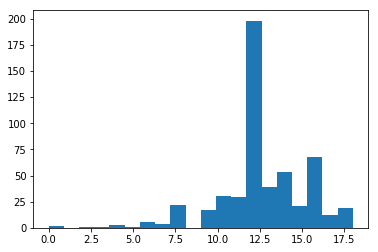

In [14]:
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#1.

wage1 = woo.dataWoo('wage1')

reg = smf.ols(formula='wage ~ educ + I(educ**2)', data=wage1)
results = reg.fit()

#manually confirm the formulas, i.e. extract coefficients and SE
b=results.params
se=results.bse

print(f'params:\n{b}\n')

#reproduce t statistics
tstat=b/se
print(f'tstat:\n{tstat}\n')

#reproduce p-values
pval=2 * stats.norm.cdf(-abs(tstat))
print(f'pval:\n{pval}\n')

# 95% CI:
CI95 = results.conf_int (0.05)
print (f' CI95: \n{CI95}\n')

# Let's also report the detailed table output using 'summary' for comparison
print(f'results.summary(): \n{results.summary()}\n')

# Turning point of the function
print (f' turning point: \n{abs(results.params[1]/(2*results.params[2]))}\n')

# persons in dataset with less than 5 years of educ and persons with more than 20 years of educ
educ_smaller_5 = (wage1['educ']<5).sum()
educ_larger_20 = (wage1['educ']>20).sum()
print (f' educ<5, educ>20 : \n{educ_smaller_5, educ_larger_20}\n')

#histogram shows that most people have at least a few years of education
display(plt.hist(wage1['educ'], bins=20))

# calculate quantiles for years of education
quant=wage1['educ'].quantile([.01, 0.05, 0.1, .25, .5, .75, .9, .99 ])
print (f' quantiles: \n{quant}\n')



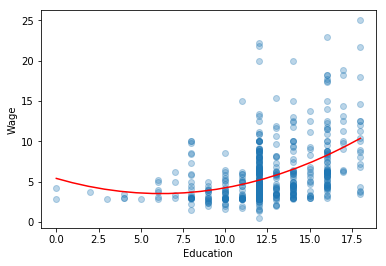

In [4]:
# plot quadratic fit
# for better illustration we use linspace to transform education in 20 equally spaced bins of the observations, see the introducton to Python notebook on linspace

plt.scatter(wage1.educ, wage1.wage, alpha=0.3)
plt.xlabel('Education')
plt.ylabel('Wage')
educ_linspace = np.linspace(wage1.educ.min(), wage1.educ.max(), 20)
educ_linspace_sq=educ_linspace**2
est = smf.ols(formula='wage ~ educ + I(educ**2)', data=wage1).fit()
plt.plot(educ_linspace, est.params[0] + est.params[1] * educ_linspace + est.params[2] *educ_linspace_sq , 'r')

As we have a quadratic function, we can't interpret the effect of an coefficient directly. Also, the effect of an additional year of education of wages is not constant anymore. The effect of an additional year of educ from 5 to 6 years is different from the effect of increasing the years of education from 6 to 7 years for instance.

All we know from the coefficient without any calculation is that an additional year of education has a decreasing effect on wages at the beginning (from 0 to 1 year at least, maybe also for later years but don't know before having computed the maximum/minimum of the function) and that this decreasing effect diminishes with increasing education (this is shown by the positive sign of the parameter estimate for educ$^2$) until the effect of an additional year of education on wages reaches the turning point and becomes zero. After this, any additonal year of education increases wages and does so in an exponential way as the effect of educ$^2$ dominates the effect of educ more and more. So we compute the turning point which is arrived at $\beta_1/(2*\beta_2)$. Now we know that the turning point is at around 6 years of education.

It doesn't seem to make sense that the effect of and additional year of education is negative at first.
It may be that this is because there are almost no observation for persons without less than 6 years in the data. We check this and see that only 7 persons in the dataset have less tha 5 years if educ. It turns out that this is the case as shown in the histogram. So we can ignore this range and should focus an a more representative range. A more representative range would be, for instance, the range 9 to 16 years. From computing quantiles we see that only 10% have less than 9 years of education and only 10% more than 16 years of education.

Regarding the significance of the parameters: As the t-statistic is larger than 2 for all regressors (in absolute terms), we know that the effect is significant at the 5% level for all regressors. We can also see this from the confidence intervals which do not include the zero. Moreover, the p-values show us that the effects are also always significant at the 1% significance level as they are always smaller than 0.01.




We now add a log(exper), female and nonwhite to the model and re-estimate it.

In [5]:
wage1['log_exper'] = np.log(wage1['exper'])
reg2 = smf.ols(formula='wage ~ educ + I(educ**2) + log_exper + female + nonwhite', data=wage1)
results2 = reg2.fit()

# Look at the estimation results:
print(f'results2.summary(): \n{results2.summary()}\n')

results2.summary(): 
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     58.00
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           6.23e-48
Time:                        20:15:21   Log-Likelihood:                -1316.5
No. Observations:                 526   AIC:                             2645.
Df Residuals:                     520   BIC:                             2671.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7436    

Now let's predict the quadratic effect of $education$ on $wage$ for values larger than the 10% and smaller than the 90% quantile values of education.Hold the other variables fixed at their mean for the prediction. Report the predictions in a table.
From before we know that these valus are 9 and 16 years of educ.

We also visualize the effects and add confidence intervals to it. The plotted effect shows the quadratic effect of an additional year of education for the full range (0-18 years of education). As we see, the confidence intervals are very wide for the first years, indicating the uncertainty of the estimated effect for these years (there are as we found almost no observations of persons with so few years of education in our data.).

What we also see that in the relavnt range we've chosen (9-16 years) the effect of an additional of education on wages increases every year.



means: 
    educ  log_exper    female  nonwhite
0    0.0   2.394453  0.479087  0.102662
1    1.0   2.394453  0.479087  0.102662
2    2.0   2.394453  0.479087  0.102662
3    3.0   2.394453  0.479087  0.102662
4    4.0   2.394453  0.479087  0.102662
5    5.0   2.394453  0.479087  0.102662
6    6.0   2.394453  0.479087  0.102662
7    7.0   2.394453  0.479087  0.102662
8    8.0   2.394453  0.479087  0.102662
9    9.0   2.394453  0.479087  0.102662
10  10.0   2.394453  0.479087  0.102662
11  11.0   2.394453  0.479087  0.102662
12  12.0   2.394453  0.479087  0.102662
13  13.0   2.394453  0.479087  0.102662
14  14.0   2.394453  0.479087  0.102662
15  15.0   2.394453  0.479087  0.102662
16  16.0   2.394453  0.479087  0.102662
17  17.0   2.394453  0.479087  0.102662
18  18.0   2.394453  0.479087  0.102662

 pred: 
0      3.103033
1      2.892971
2      2.753956
3      2.685989
4      2.689069
5      2.763197
6      2.908372
7      3.124595
8      3.411865
9      3.770183
10     4.199548
11     

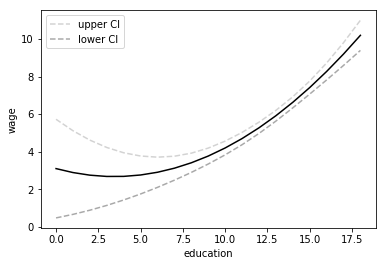

In [6]:
# predictions for educ = 9-16, all others at the sample mean:

log_exper_mean = np.mean(wage1['log_exper'])
female_mean = np.mean(wage1['female'])
nonwhite_mean = np.mean(wage1['nonwhite'])

means = pd.DataFrame({'educ': np.linspace(0, 18, num=19), # can adjust for the more relevant range (9,16,num=8)
                  'log_exper': log_exper_mean,
                  'female': female_mean,
                  'nonwhite': nonwhite_mean})
print(f'means: \n{means}\n')


# point estimate of prediction (means):
pred = results2.predict (means)
print (f' pred: \n{pred}\n' )

# calculate 95% confidence interval:
lpr_PICI = results2.get_prediction(means).summary_frame(alpha=0.05)
lpr_CI = lpr_PICI[['mean', 'mean_ci_lower', 'mean_ci_upper']]
print(f'lpr_CI: \n{lpr_CI}\n')

# plot:
plt.plot(means['educ'], lpr_CI['mean'], color='black',
         linestyle='-', label='')
plt.plot(means['educ'], lpr_CI['mean_ci_upper'], color='lightgrey',
         linestyle='--', label='upper CI')
plt.plot(means['educ'], lpr_CI['mean_ci_lower'], color='darkgrey',
         linestyle='--', label='lower CI')
plt.ylabel('wage')
plt.xlabel('education')
plt.legend()




# Exercise 10: Solution

Let's load the data and run the regression of doctor visits on logincome and healt status.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('https://raw.githubusercontent.com/statsmodels/statsmodels/master/statsmodels/datasets/randhie/src/randhie.csv')
df["logincome"] = np.log1p(df.income) #logincome contains some zeros, so we add a 1 before taking logs
df[['mdvis', 'logincome', 'hlthp']].tail()

reg3 = smf.ols(formula='mdvis ~ logincome + hlthp', data=df)
results3 = reg3.fit()

print(f'results3.summary(): \n{results3.summary()}\n')

results3.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  mdvis   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     129.8
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           9.36e-57
Time:                        22:33:56   Log-Likelihood:                -58906.
No. Observations:               20190   AIC:                         1.178e+05
Df Residuals:                   20187   BIC:                         1.178e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2725      0.22

In [2]:
df[['mdvis','hlthp', 'logincome']].describe()

,mdvis,hlthp,logincome
count,20190.000000,20190.000000,20190.000000
mean,2.860426,0.014958,8.708265
std,4.504365,0.121387,1.228309
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8.582102
50%,1.000000,0.000000,8.984312
75%,4.000000,0.000000,9.256801
max,77.000000,1.000000,10.283243


The coefficient of logincome says that an increase in income of 1% increases the number of doc visits by 0.003 (remember the level-log interpretation is $\Delta y =(\beta_1/100)\%\Delta x$). So the effect is significant but very small. A person with a bad health status has on average 3.28 doctor visits more than a healthy person. This is twice the mean of the number of doctor visits in the data. But it is possible because only a very low share of the people in the dataset have a (self-reported) bad health status, so there impact on the mean of doctor visits is small.

Because hlthp is a binary variable we can visualize the linear regression model by plotting two lines: one for `hlthp == 0` and one for `hlthp == 1`.


est.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  mdvis   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     129.8
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           9.36e-57
Time:                        22:33:56   Log-Likelihood:                -58906.
No. Observations:               20190   AIC:                         1.178e+05
Df Residuals:                   20187   BIC:                         1.178e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2725      0.227    

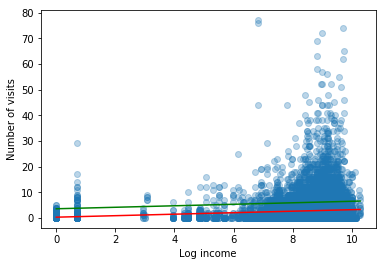

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df.logincome, df.mdvis, alpha=0.3)
plt.xlabel('Log income')
plt.ylabel('Number of visits')
logincome_linspace = np.linspace(df.logincome.min(), df.logincome.max(), 100)
est = smf.ols(formula='mdvis ~ logincome + hlthp', data=df).fit()
plt.plot(logincome_linspace, est.params[0] + est.params[1] * logincome_linspace + est.params[2] * 0, 'r')
plt.plot(logincome_linspace, est.params[0] + est.params[1] * logincome_linspace + est.params[2] * 1, 'g')
print(f'est.summary(): \n{est.summary()}\n')

The two lines are parallel. This is because the categorical variable 'hlthp' affects only the intercept and not the slope (which is the coefficient of 'logincome'). We can then include an interaction term to explore the effect of an interaction between the two — i.e. we let the slope be different for the two categories. If we include the interactions, now each of the lines can have a different slope. This captures the effect that variation with income may be different for people who are in poor health than for people who are in better health. Note that we also have to include the two interacted variables in the model two because if a variable is important due to an interaction, it also has an effect by itself usually. So this has to be tested at least.




est.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  mdvis   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     93.21
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           6.57e-60
Time:                        22:42:18   Log-Likelihood:                -58896.
No. Observations:               20190   AIC:                         1.178e+05
Df Residuals:                   20186   BIC:                         1.178e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5217

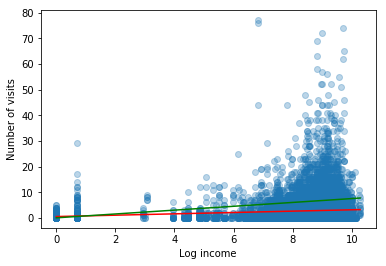

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df.logincome, df.mdvis, alpha=0.3)
plt.xlabel('Log income')
plt.ylabel('Number of visits')

est = smf.ols(formula='mdvis ~ hlthp * logincome', data=df).fit()

plt.plot(logincome_linspace, est.params[0] + est.params[1] * 0 + est.params[2] * logincome_linspace +
est.params[3] * 0 * logincome_linspace, 'r')

plt.plot(logincome_linspace, est.params[0] + est.params[1] * 1 + est.params[2] * logincome_linspace +
est.params[3] * 1 * logincome_linspace, 'g')

print(f'est.summary(): \n{est.summary()}\n')


The interaction term says that the effect of health status on the number of doctor visits changes with income: for those in a 'not bad'  health condition the number of doc visits increases by 0.0026 when income increases by one percent. For those in a bad health condition the number of doc visits increases by 0.0026 + 0.0049 = 0.0075 when income increases by one percent. There is no difference in the intercepts with regard to health status because the coefficient of 'healthp' is not statistically significant. 